<a href="https://colab.research.google.com/github/jfgf11/Problema-Especial/blob/master/Problema_Especial_Italiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se monta el Drive para importar y guardar los datos y modelos.
from google.colab import drive
drive.mount('/content/drive')#,force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Se instalan las librerias necesarias
!pip install librosa
!pip install progressbar2

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


# Importar

In [1]:
import matplotlib.pyplot as plt

# Tensor Flow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

# Recopilacion de datos
import xml.dom.minidom
from scipy.io import wavfile
import numpy as np

# Para el preprocesamiento
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from collections import Counter

import librosa
import progressbar


# Import libraries 
import librosa.display
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings


#Redes neuronales sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats




from sklearn.utils.class_weight import compute_class_weight



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Funciones Resultados

In [0]:
def graficarMatrizConfusion(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  

  plt.figure(figsize=(8,8))

  ax = sns.heatmap(cm, annot = True, cbar = False);
      
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
      
  plt.xlabel("Clase Prediccion")
  plt.ylabel("Clase Verdadera")
  plt.title("Matriz de Confusion")

  plt.show()
  

# Cargar y guardar modelos

In [0]:
#Estas funciones permiten guardar y cargar un modelo, a partir de las rutas indicadas por parametro.
def guardarModelo(pModelo, pRutaModelo, pRutaPesos, pRutaDiagrama):
  modelo_json = pModelo.to_json()

  with open(pRutaModelo, "w") as archivo_json:
      archivo_json.write(modelo_json)

  pModelo.save_weights(pRutaPesos)

  plot_model(pModelo, to_file = pRutaDiagrama, show_shapes = True)

def cargarModelo(pRutaModelo, pRutaPesos):
  archivo_json = open(pRutaModelo, 'r')
  modelo_json = archivo_json.read()
  archivo_json.close()
  modelo = model_from_json(modelo_json)

  modelo.load_weights(pRutaPesos)

  return modelo

Guardar modelo

In [0]:
#rutaModelo = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Modelo85.json"
#rutaPesos = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/PesosModelo85.h5"
#rutaDiagrama = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/DiagramaModelo85.png"

#guardarModelo(modelo1, rutaModelo, rutaPesos, rutaDiagrama)


Cargar Modelo

In [0]:
#rutaModelo = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/Modelo85.json"
#rutaPesos = "drive/My Drive/Proyecto Especial Italiano/Modelos/Modelos raw_Conv/PesosModelo85.h5"
#modelo1 = cargarModelo(pRutaModelo=rutaModelo, pRutaPesos=rutaPesos)

# Recopilación de Datos

In [0]:
def ObtenerSonidos(Inicial_pNXML,   Final_pNXML,    Inicial_nAudios,               Final_nAudios,
                  ventana_Tiempo=0.1,         salto_de_ventana=4,    Calcular_Features=False,       Sin_Background = False,
                  rutaDatosXML="drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training",
                  rutaDatosSounds ="drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds", Solo_Background = False, sample_rate = 32000, MFCC = False,
                  window_length_stft= 0.032, Step_size_stft=0.01):


  NMV = round(ventana_Tiempo*sample_rate) # Numero de muestras por ventana
  NMV_advance = round(NMV/salto_de_ventana) # Numero de muestras por las cuales se avanza
  window = np.hamming(NMV)

  if Calcular_Features: datos_x_totales=np.zeros((1,312)) 
  else: datos_x_totales=np.zeros((NMV*1500,NMV))
  datos_y_totales=np.zeros(NMV*1500)
  contador=0
  with progressbar.ProgressBar(max_value=(Final_pNXML-Inicial_pNXML+1)*(Final_nAudios-Inicial_nAudios+1)) as bar:
    longitud_actual = 0
    for i in range(Inicial_pNXML_,(Final_pNXML_+1)):
        
        if i<10:  h="0" # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
        else: h=""

        doc = xml.dom.minidom.parse(rutaDatosXML + "/000" + h + str(i) + ".xml")
        start = doc.getElementsByTagName("STARTSECOND") #Vector que contiene el tiempo en segundos de inicio de todos los eventos 
        finish = doc.getElementsByTagName("ENDSECOND") #Vector que contiene el tiempo en segundos de finalizacion de todos los eventos
        ID = doc.getElementsByTagName("CLASS_ID") # Vector que contiene la etiqueta de cada uno de los eventos
        events = doc.getElementsByTagName("events") # Indica informacion de todos los eventos en un archivo xml (tamaño)
        a, b, c, d=(events[0].attributes["size"].value) #Se obtiene el numero de eventos en un audio
        nEventos = int(c+d) # numero de eventos en un audio


        
        for a in range(Inicial_nAudios, (Final_nAudios)+1):# Numero de audios por xml
          if a<2: # Se hace esto debido que en los audios hay elementos 00001_01 y 00010_1
            r = "0"
            t=str(a)
          else:
            t=str(a-1)
            r=""
          frameData, fs = librosa.load(rutaDatosSounds + '/000' + h + str(i) +'_'+ r + t +'.wav', sr=sample_rate, res_type='kaiser_fast') #Audio seleccionado
          datos_x = (librosa.util.frame(frameData, frame_length=NMV, hop_length=NMV_advance)).T # Reorganiza los datos dándole saltos de tiempo de NMV_advance y el número de muestras por ventana NMV
          datos_y = np.zeros(len(frameData)) #Etiquetas de cada uno de los datos, los datos no asignados serán 0 y corresponderan a sonido ambiente
   


          for j in range(0,nEventos): # Se recorre el numero de eventos para cada xml
            startFrame = float(str(start[j].firstChild.data))*fs #Posicion inicial de evento con respecto a frameData
            endFrame = float(str(finish[j].firstChild.data))*fs #Posicion final de evento con respecto a frameData
            label = ID[j].firstChild.data #etiqueta del evento

            datos_y[round(startFrame):round(endFrame)]=int(label) # Se asigna la etiqueta a cada uno de los datos recopilados

          datos_y = (((stats.mode(librosa.util.frame(datos_y, frame_length=NMV, hop_length=NMV_advance)))[0]).T)# Con esto se asigna la etiqueta a datos desplazados en el tiempo
          datos_y = np.reshape(datos_y, (-1), 'F')

          if Sin_Background: # Si se quieren datos sin background
            datos_x = datos_x[datos_y!=0,:]
            datos_y =  datos_y[datos_y!=0]
          
          if Solo_Background:
            datos_x = (datos_x[datos_y==0,:])[0:round(len(datos_y[datos_y==0])),:]
            datos_y =  (datos_y[datos_y==0])[0:round(len(datos_y[datos_y==0]))]

          #if Calcular_Features: # Si se quieren datos con Features
          #  datos_x= features(np.float32(datos_x),fs)
          longitud_siguiente = longitud_actual + len(datos_y)
          datos_y_totales[longitud_actual:longitud_siguiente] = datos_y
          datos_x_totales[longitud_actual:longitud_siguiente,:] = datos_x
          longitud_actual = longitud_siguiente
          
          #datos_x_totales = np.r_[datos_x,datos_x_totales]
          #datos_y_totales = np.r_[datos_y,datos_y_totales]
          
          contador+=1
          bar.update(contador) #Se actualiza la barra de progreso
          
    datos_x_totales = datos_x_totales[0:longitud_siguiente,:]
    datos_y_totales = datos_y_totales[0:longitud_siguiente]

    datos_y_totales[datos_y_totales==4] = 1
    dato_x2_totales = None
    if MFCC: # Se crea el Spectogram para cada dato
      dato_x2_totales = Crear_Datos_MFCC(datos_x_totales ,fs, window_length_stft, Step_size_stft)

    
  return datos_x_totales, dato_x2_totales ,datos_y_totales

Datos Espectograma

In [0]:
def Crear_Datos_MFCC(pX,sr_, window_length_stft, Step_size_stft):
  contador=0
  with progressbar.ProgressBar(max_value=(len(pX))) as bar:
    ps = librosa.feature.melspectrogram(y=pX[0],  sr=sr_)# n_mfcc=13)#, n_fft = int(window_length_stft*sr_), hop_length = int(Step_size_stft*sr_),htk=True)
    x_2 = np.zeros((len(pX)+1,len(ps),len(ps[0])))
    for i in range(0,len(pX)):
      ps = librosa.feature.melspectrogram(y=pX[i], sr=sr_)
      ps = librosa.power_to_db(ps, ref=np.max)
      x_2[i] = ps
      contador+=1
      bar.update(contador) #Se actualiza la barra de progreso
  x_2 = x_2[0:-1,:]
  return x_2

Lo siguiente permite obtener los datos e sonido y guardarlos. Por mantener un formato de deben seleccionar o 5 xml o únicamente 1. EJM: de 1-5 ó de 1-1

In [0]:
ventana_Tiempo_ = 0.046 #La ventana de tiempo de cada muestra (32ms)
salto_de_ventana_ = 4  #Corrimiento en tiempo (32ms/4)
sample_rate_ = 22050
window_length_stft_ = 0.032 # Ventana de tiempo para la short-Time Fourier Transform
Step_size_stft_ = 0.010 # Saltos el en tiempo para la transformada de Fourier
Sin_Background_ = False # True: no se obtienen datos de background; False: No se obtienen datos de background
Features_ = False # Obtener o no features
Inicial_pNXML_ = 1 # Número inicial de archivos XML utilizados
Final_pNXML_ = 10 # Número final de archivos XML utilizados
Inicial_nAudios_ = 0 # Número inicial de audios que se obtendrán (esto no aplica para nuestros audios)
Final_nAudios_ = 7 # Número final de audios que se obtendrán (esto no aplica para nuestros audios)
rutaDatosXML_ = "drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training" #Ruta para encontrar archivos xml
rutaDatosSounds_ = "drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds"  #Ruta para encontrar Audios
Solo_Background_ = False #Solo obtener datos de background

MFCC_ = True #Calcular a su vez el MFCC


#nXML=66 # Numero de archivos XML 
#nAudios=nXML*8 # Numero de audios totales 

x, x2, y =ObtenerSonidos(Inicial_pNXML = Inicial_pNXML_, Final_pNXML = Final_pNXML_,     Inicial_nAudios = Inicial_nAudios_,
                    Final_nAudios = Final_nAudios_,  ventana_Tiempo=ventana_Tiempo_, salto_de_ventana=salto_de_ventana_, 
                    Calcular_Features=Features_,        Sin_Background =Sin_Background_, 
                    rutaDatosXML = rutaDatosXML_,   rutaDatosSounds=rutaDatosSounds_, Solo_Background = Solo_Background_, 
                    sample_rate=sample_rate_,        MFCC=MFCC_, window_length_stft= window_length_stft_, Step_size_stft=Step_size_stft_)

if Sin_Background_: Back = "_SIN_BACK"
elif Solo_Background_: Back = "_SOLO_BACK"
else: Back = ""
if Features_: Features_or_raw = " Features"
else: Features_or_raw = " raw_Conv"

if MFCC_:
  np.save("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw +"/x2_"+str(Inicial_pNXML_)+"-"
        + str(Final_pNXML_)+ "_XML_"+str(Inicial_nAudios_)+"-"+ str(Final_nAudios_) +"_Audios_46ms" + Back, x2)
x2 = []
NMV = round(ventana_Tiempo_*sample_rate_) # Numero de muestras por ventana
window = np.hamming(NMV)
datos_x_totales = datos_x_totales*window #Se pasa cada uno de los datos por una ventana de hamming

np.save("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw +"/x_"+str(Inicial_pNXML_)+"-"
        + str(Final_pNXML_)+ "_XML_"+str(Inicial_nAudios_)+"-"+ str(Final_nAudios_) +"_Audios_46ms" + Back, x)
np.save("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw +"/y_"+str(Inicial_pNXML_)+"-"
        + str(Final_pNXML_)+ "_XML_"+str(Inicial_nAudios_)+"-"+ str(Final_nAudios_) +"_Audios_46ms" + Back, y)

 37% (30 of 80) |#########               | Elapsed Time: 0:01:45 ETA:   0:03:00

El objetivo de la siguiente función es acoplar los datos de los descriptores o de los datos raw obtenidos en un solo vector.

# Preprocesamiento de los datos
Aquí se debe realizar todo el preprocesamiento de los datos. Se debe considerar el desbalance en los datos de entrenamiento. Primero se separan los datos de entrenamiento y validación.

Se extraen los datos guardados:

La siguiente celda permite extraer los datos raw (caso particular con ventanas de 1024), sin features y únicamente pasados a través de una ventana de hamming.

In [0]:
def Extraer_Datos_Guardados(Features, pInicial, pFinal):
  if Features: Features_or_raw = " Features/"
  else: Features_or_raw = " raw_Conv/"
  x_1 = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw + "x_"+pInicial+"-"+pFinal+"_0-7_Audios.npy")
  x_2 = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw + "/y_train_"+pInicial+"-"+pFinal+"_0-7_Audios.npy")
  y = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos" + Features_or_raw + "/x_test_"+pInicial+"-"+pFinal+"_0-7_Audios.npy")
  return x_1, x_2, y

La siguiente celda permite extraer los datos




In [0]:
Features_Datos_Actuales = False
pInicial_ = "1"
pFinal_ = "5"
x1, x2, y = Extraer_Datos_Guardados(Features=Features_Datos_Actuales, pInicial = pInicial_, pFinal = pFinal_)
print("DONE")

Extraer datos específicos

In [0]:
x = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/x_1-10_XML_0-7_Audios_46ms_H.npy")
x2 = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/x2_1-10_XML_0-7_Audios_46ms_H.npy")
y = np.load("drive/My Drive/Proyecto Especial Italiano/Datos Procesados/Datos raw_Conv/y_1-10_XML_0-7_Audios_46ms_H.npy")

In [0]:
print('Original dataset shape %s' % Counter(y_train))

La siguiente celda permite dividir los datos en datos de entrenamiento y datos de validación

In [0]:
x_train_1, x_test_1, y_train, y_test = train_test_split(x, y , random_state = 0, test_size=0.20)
x=[]
x_train_2, x_test_2, y_train, y_test = train_test_split(x2, y, random_state = 0, test_size=0.20)
x2 = []
y=[]


In [0]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0.0: 821731, 1.0: 87377, 2.0: 82552, 3.0: 27572})


In [0]:
x_train_1.shape

(1019232, 1014)

Si se desean realizar pruebas sin datos de background ejecutar el siguiente código:

In [0]:
#x_train=x_train[y_train!=0]
#y_train=y_train[y_train!=0]
#x_test=x_test[y_test!=1]
#y_test=y_test[y_test!=1]
#y_test[y_test==1]=0
#y_test[y_test==2]=1
#y_test[y_test==3]=2
#y_train[y_train==1]=0
#y_train[y_train==2]=1
#y_train[y_train==3]=2

Random under Sampling

In [0]:
#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, 13*11), 'F')

print('Original dataset shape %s' % Counter(y_train))

rus = RandomUnderSampler(random_state=42)
x_train_1, l = rus.fit_resample(x_train_1, y_train)
l=[]
x_train_2, y_train = rus.fit_resample(x_train_2, y_train)

print('Resampled dataset shape %s' % Counter(y_train))

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, 13, 11), 'F')


Random Over Sampler.


Esto va a hacer que todo colapse si hay muchos datos


In [0]:
#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, 13*11), 'F')

print('Original dataset shape %s' % Counter(y_train_))
print("Oversampling...")

randomOverSampler = RandomOverSampler(sampling_strategy = 'not majority', random_state = 0)
x_train_1, l = randomOverSampler.fit_resample(x_train_1, y_train)
l=[]
x_train_2, y_train = randomOverSampler.fit_resample(x_train_2, y_train)


print("Reshaping...")
print('Resampled dataset shape %s' % Counter(y_train_))

#x_train_1 = np.reshape(x_train_1, (-1, 1600), 'F')
x_train_2 = np.reshape(x_train_2, (-1, 13, 11), 'F')

Si se utiliza Keras, se debe correr la siguiente celda por el formato de como deben estar los datos

In [0]:
Features_Datos_Actuales=False
if Features_Datos_Actuales:
  x_train_1 = np.reshape(x_train_1, (-1, 312, 1), 'F')
  x_test_1 = np.reshape(x_test_1, (-1, 312, 1), 'F')
else:
  x_train_1 = np.reshape(x_train_1, (-1, 1014, 1), 'F')
  x_test_1 = np.reshape(x_test_1, (-1, 1014, 1), 'F')
  x_train_2 = np.reshape(x_train_2, (-1,1, 128, 2), 'F')
  x_test_2 = np.reshape(x_test_2, (-1,1, 128, 2), 'F')  

En esta celda se calculan los pesos de cada clase, a partir de la cantidad de cada una en los datos de entrenamiento.Estos pesos también pueden ser variados manualmente.

In [0]:

pesosClases = compute_class_weight(class_weight = 'balanced', classes = np.array([0, 1, 2,3]), y = y_train)

PesosClases = {0: pesosClases[0]*0.0001,
               1: pesosClases[1]+10,
               2: pesosClases[2]+10,
               3: pesosClases[3]+30}
#PesosClases2 = {0: 1.07,
#               1: 0.85,
#               2: 1.1,
#               3: 1.05}
print(PesosClases)

{0: 3.100868775791591e-05, 1: 12.91619075958204, 2: 13.086636301967244, 3: 39.24154939793994}


# Entrenamiento con diferentes Modelos

# Modelos Convolucionales

Trabajo a futuro, agregar parámetros de regularización...

# Modelo CNN 1D

In [0]:
def crearModelo2(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):

  modelo = Sequential()

  modelo.add(Input(shape = (1014,1)))

  modelo.add(Conv1D(pNumFiltros[0], (int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(Conv1D(pNumFiltros[1], (int(pTamFiltros[1])), padding='same', activation = 'relu'))
  modelo.add(Conv1D(pNumFiltros[2], (int(pTamFiltros[2])), padding='same', activation = 'relu'))
  #modelo.add(Conv1D(pNumFiltros[3], (int(pTamFiltros[3])), padding='same', activation = 'relu'))

  modelo.add(MaxPooling1D((int(pTamFiltros[0])), padding='same'))



  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
def crearModelo(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):

  capaEntrada = Input(shape = (706,1))

  capa1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada)
  #pooling1 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capa1)

  capa2 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(capa1)
  pooling2 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa2)

  capas = Flatten()(pooling2)
  capas = Dropout(0.5)(capas)
  
  capas = Dense(pNumNeuronas[0], activation='relu')(capas)
  #capas = Dense(pNumNeuronas[1], activation='relu')(capas)

  capaSalida = Dense(4, activation='softmax')(capas)

  modelo = Sequential()
  modelo.add(Model(capaEntrada, capaSalida))

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.layers[0].summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([10, 10, 15, 100, 100, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([20, 10, 5, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([4, 2, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1014, 10)          210       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1014, 10)          1010      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1014, 15)          765       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 51, 15)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 51, 15)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 765)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

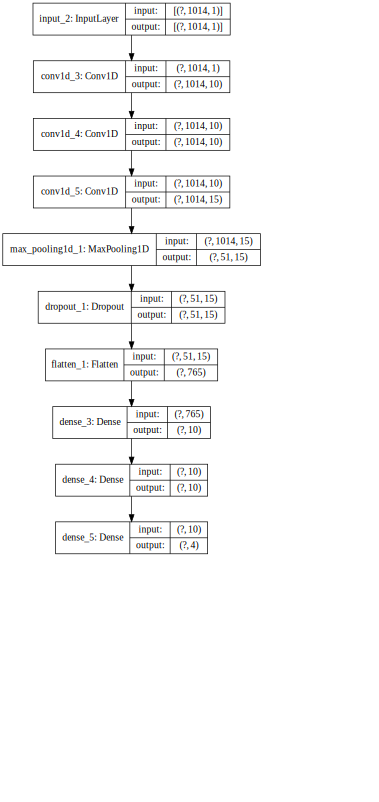

In [0]:
modelo1 = crearModelo2(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo1.fit(x_train_1, y_train, validation_data=(x_test_1, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))


Train on 1019232 samples, validate on 254808 samples
Epoch 1/100
1019232/1019232 [==============================] - 38s 37us/sample - loss: 0.6226 - sparse_categorical_accuracy: 0.8147 - val_loss: 0.4634 - val_sparse_categorical_accuracy: 0.8518
Epoch 2/100
1019232/1019232 [==============================] - 30s 30us/sample - loss: 0.4115 - sparse_categorical_accuracy: 0.8702 - val_loss: 0.3766 - val_sparse_categorical_accuracy: 0.8861
Epoch 3/100
 840000/1019232 [=======================>......] - ETA: 4s - loss: 0.3672 - sparse_categorical_accuracy: 0.8871

KeyboardInterrupt: ignored

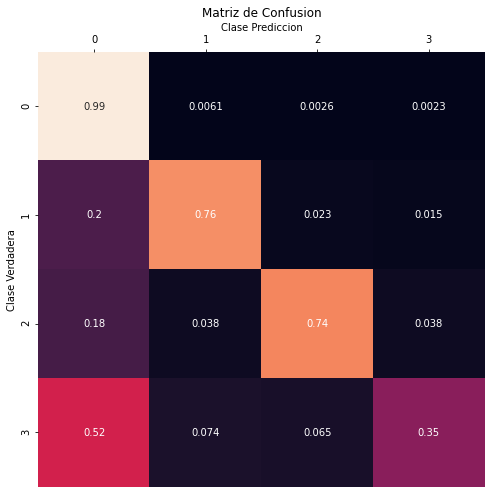

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo1.predict_classes(x_test_1))

# Modelo CNN 2D

In [0]:
def crearModelo2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):

  modelo = Sequential()

  modelo.add(Input(shape = (1,128,2)))

  modelo.add(Conv2D(pNumFiltros[0], (int(pTamFiltros[0]),int(pTamFiltros[0])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[1], (int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[2], (int(pTamFiltros[2]),int(pTamFiltros[2])), padding='same', activation = 'relu'))
  modelo.add(Conv2D(pNumFiltros[3], (int(pTamFiltros[3]),int(pTamFiltros[3])), padding='same', activation = 'relu'))
  #modelo.add(Conv2D(pNumFiltros[4], (int(pTamFiltros[4]),int(pTamFiltros[4])), padding='same', activation = 'relu'))
  #modelo.add(Conv2D(pNumFiltros[5], (int(pTamFiltros[5]),int(pTamFiltros[5])), padding='same', activation = 'relu'))

  modelo.add(MaxPooling2D((int(pTamFiltros[1]),int(pTamFiltros[1])), padding='same'))



  modelo.add(Dropout(0.5))
  modelo.add(Flatten())

  modelo.add(Dense(pNumNeuronas[0], activation='relu'))
  modelo.add(Dense(pNumNeuronas[1], activation='relu'))
  modelo.add(Dense(pNumNeuronas[2], activation='relu'))
  #modelo.add(Dense(pNumNeuronas[3], activation='relu'))

  modelo.add(Dense(4, activation='softmax'))


  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo

In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([16, 32, 64, 128, 256, 512])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([2, 4, 4, 3, 3, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([4, 2, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([10, 10, 10, 16])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 1, 128, 16)        144       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 128, 32)        8224      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 128, 64)        32832     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 1, 128, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 32, 128)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 32, 128)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

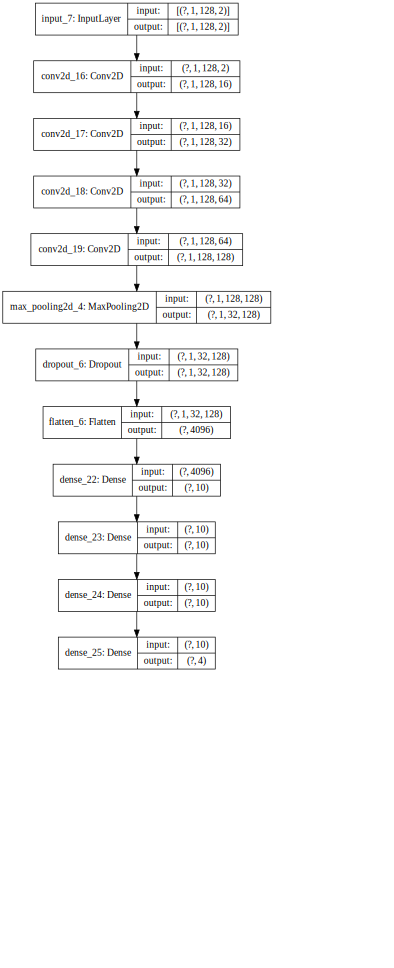

In [0]:
modelo2 = crearModelo2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo2, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo2.fit(x_train_2, y_train, validation_data=(x_test_2, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        

  #SVG(model_to_dot(modelo1, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))

Train on 1019232 samples, validate on 254808 samples
Epoch 1/100
1019232/1019232 [==============================] - 31s 30us/sample - loss: 0.5502 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.3916 - val_sparse_categorical_accuracy: 0.8936
Epoch 2/100
1019232/1019232 [==============================] - 29s 29us/sample - loss: 0.3560 - sparse_categorical_accuracy: 0.8995 - val_loss: 0.3160 - val_sparse_categorical_accuracy: 0.9143
Epoch 3/100
1019232/1019232 [==============================] - 32s 32us/sample - loss: 0.2779 - sparse_categorical_accuracy: 0.9234 - val_loss: 0.2572 - val_sparse_categorical_accuracy: 0.9281
Epoch 4/100
1019232/1019232 [==============================] - 32s 32us/sample - loss: 0.2368 - sparse_categorical_accuracy: 0.9362 - val_loss: 0.1926 - val_sparse_categorical_accuracy: 0.9504
Epoch 5/100
1019232/1019232 [==============================] - 29s 29us/sample - loss: 0.2123 - sparse_categorical_accuracy: 0.9436 - val_loss: 0.1796 - val_sparse_categorical

KeyboardInterrupt: ignored

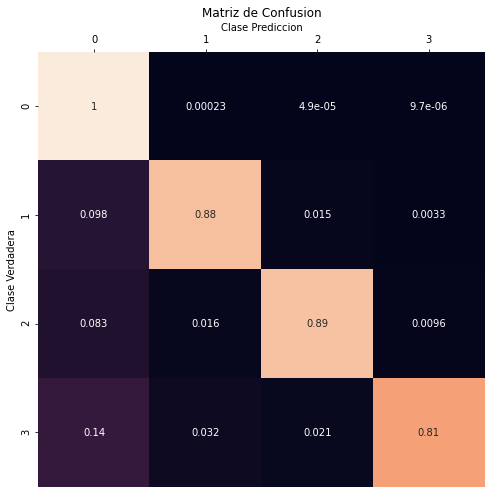

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_2))

In [0]:
graficarMatrizConfusion(y_true=y_test, y_pred=modelo2.predict_classes(x_test_2))

# Modelo CNN 1D y 2D

In [0]:
def crearModelo_1D_y_2D(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):
  # CONV 1D
  capaEntrada_1 = Input(shape = (1600,1))

  capa1_1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_1)
  pooling1_1 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capa1_1)

  capa2_1 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_1)
  pooling2_1 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa2_1)
  
  flatten_1 = Flatten()(pooling2_1)

  # CONV 2D
  capaEntrada_2 = Input(shape = (1,13,11))

  capa1_2 = Conv2D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada_2)
  pooling1_2 = MaxPooling2D(int(pTamPooling[0]), padding='same')(capa1_2)

  capa2_2 = Conv2D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(pooling1_2)
  pooling2_2 = MaxPooling2D(int(pTamPooling[1]), padding='same')(capa2_2)
  
  flatten_2 = Flatten()(pooling2_2)


  capas = concatenate([flatten_1, flatten_2])

  capas = Dropout(0.5)(capas)
  
  capas = Dense(pNumNeuronas[0], activation='relu')(capas)
  capas = Dense(pNumNeuronas[1], activation='relu')(capas)

  capaSalida = Dense(4, activation='softmax')(capas)

  #modelo = Sequential()
  modelo = Model(inputs = [capaEntrada_1, capaEntrada_2], outputs = capaSalida)

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()
  
  return modelo




In [0]:
#Esta celda construye los modelos, a partir de los parametros especificados por cada una de las siguientes variables.
#Es el numero de filtros que cada capa convolucional utiliza.
numFiltros = np.array([5, 10, 100, 100, 100, 10])

#Es el tamaño de los filtros utilizados en cada capa convolucional.
tamFiltros = np.array([10, 10, 10, 8, 8, 5])

#Es el tamaño de cada capa de Pooling.
tamPooling = np.array([5, 5, 3, 3, 3, 3])

#Es el numero de neuronas en cada capa de la red neuronal que sigue despues de la parte convolucional.
numNeuronas = np.array([4, 4, 10])

#Es el tipo de optimizador a utilizar.
#Se pueden especificar: "sgd", "adam" o "rmsprop"
optimizer="rmsprop"

#Es la tasa de aprendizaje del optimizador.
tasa = 0.1

#Es el parametro de regularizacion a utilizar.
alpha = 0.01

In [0]:
modelo3 = crearModelo_1D_y_2D(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo3, show_shapes = True, expand_nested = True, dpi = 50).create(prog='dot', format='svg'))

In [0]:
epocas = 100
batchSize = 5000

#modelo1.compile(loss='sparse_categorical_crossentropy', optimizer = "rmsprop", metrics = ['sparse_categorical_accuracy'])

for i in range(0,1):
  #hist = modelo1.fit(x, y, verbose = 1, validation_data=(x, y), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo3.fit([x_train_1,x_train_2], y_train, validation_data=([x_test_1,x_test_2], y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)
 
                        


In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

In [0]:
y_prob = modelo3.predict ([x_test_1,x_test_2])
y_pred_=y_prob.argmax(axis=-1)
graficarMatrizConfusion(y_true=y_test, y_pred=y_pred_)

# Perceptrón Multicapa
Se intenta utilizar un perceptron multicapa como clasificador. El entrenamiento del mismo se puede apreciar en la gráfica "Probabilidad de acierto contra número de iteraciones". Cabe resaltar que este clasificador es entrenado con los descriptores obtenidos.

In [0]:
n=10
error=[]
Proba_error_prueba=100000
error_actual=1000000
Proba_error_prueba_tan=100000
modeloPrueba = MLPClassifier(activation = 'relu',hidden_layer_sizes=(n,), max_iter=1, batch_size=1000, 
                             solver='adam', tol=0.001, warm_start =True,momentum=0.5, learning_rate_init=0.0001,
                             learning_rate = 'adaptive', nesterovs_momentum=True, power_t=0.5)
for i in range(0,100):
    print(i)
    modeloPrueba.fit(x_train[y_train!=0],y_train[y_train!=0])
    error_actual = 1-modeloPrueba.score(x_train[y_train!=0],y_train[y_train!=0])
    error.append(error_actual)
    if(error_actual<Proba_error_prueba):
        N_neuronas=n
        fcn_activacion="tanh"
        modelo = modeloPrueba
        Proba_error_prueba = error_actual
    if(error_actual<Proba_error_prueba_tan):
        N_neuronas_tan=n
        modelo_tan = modeloPrueba
        Proba_error_prueba_tan = error_actual
print("Número de neuronas utilizadas para la mejor probabilidad de error")
print("Mejor probabilidad de acierto")
print(1-Proba_error_prueba_tan)

In [0]:
plt.plot(1-(np.array(error)), label = "Entrenamiento modelo") 
plt.xlabel('iteraciones') 
plt.ylabel('Probabilidad de acierto (%)') 
plt.title('Probabilidad de acierto contra número de iteraciones') 
plt.legend() 
plt.show()

# Pruebas

(128, 13)


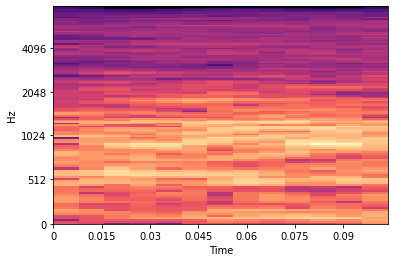

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
ps = librosa.feature.melspectrogram(y=frameData[0:1599], sr=fs, n_fft = 512, hop_length = int(512/4) )
print(ps.shape)
S_dB = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                        y_axis='mel', sr=fs,hop_length=int(512/4),
                          fmax=8000)



16000
(13, 11)
[-5.23318762e-15  5.55111512e-16  2.62416351e-16  2.01858732e-17
  2.85125459e-16 -1.19853622e-17 -1.41301112e-16  6.56040878e-17
 -1.81672859e-16  6.05576195e-17 -4.03717464e-17  9.08364293e-17
 -6.05576195e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


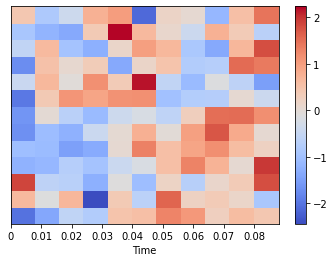

In [0]:
frameData, fs = librosa.load("drive/My Drive/Proyecto Especial Italiano/MIVIA_DB4_dist/training/sounds/00001_6.wav", sr=16000, res_type='kaiser_fast') #Audio seleccionado
ps = librosa.feature.mfcc(y=frameData[0:1600], sr=fs, n_mfcc=13, n_fft = 512, hop_length = 160,htk=True )
ps = preprocessing.scale(ps, axis=1)
print(fs)
print(ps.shape)
print (ps.mean(axis=1))
print (ps.var(axis=1))

#S_dB = librosa.power_to_db(ps, ref=np.max)
librosa.display.specshow(ps, x_axis='time', sr=fs,hop_length=int(512/4))
plt.colorbar()

In [0]:
# SVM
# Ejemplo con datdabse de cancer para implementar un SVM
from sklearn import datasets, svm, metrics, model_selection
print('primera prueba SVM')

cancer = datasets.load_breast_cancer()
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)
# Since our data is seperated by semicolons we need to do sep=";"

x = cancer.data  # All of the features
y = cancer.target  # All of the labels

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)

print(acc)

In [0]:

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('Necesito aprender a cargar datos a esta pagina !!')

# Formas de extraer features
###################### Entendiendo MFCC ##################
# necesito agregar un path valido

#mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
# Plots para entender lo que esta pasando
# audio wave
#plt.figure(figsize=(20, 15))
#plt.subplot(3,1,1)
#librosa.display.waveplot(X, sr=sample_rate)
#plt.title('Audio sampled at 44100 hrz')

# MFCC
#plt.figure(figsize=(20, 15))
#plt.subplot(3,1,1)
#librosa.display.specshow(mfcc, x_axis='time')
#plt.ylabel('MFCC')
#plt.colorbar()

#################### comparar 2 audios usando el MFCC ####################

# Source - RAVDESS; Gender - Female; Emotion - Angry 
#path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
#X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
#female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
#path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
#X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
#male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(male))

# audio wave
#plt.figure(figsize=(20, 15))
#plt.subplot(3,1,1)
#plt.plot(female, label='female')
#plt.plot(male, label='male')
#plt.legend()

#path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"

#Later on, during the accuracy improvement phase, we may expand our feature set to include Mel-Spectogram, Chroma, HPSS and etc... and not just a simple mean


In [0]:
def features(X, sample_rate):
    features_ = np.zeros((1,312))
    with progressbar.ProgressBar(max_value=len(X[:,1])) as bar:
      for j in range(0,len(X[:,1])):
      # Se obtiene el Short time Fourier Transform
      
        stft = np.abs(librosa.stft(np.reshape(X[j,:], (1024), 'F')))

        # fmin, se obtiene el tono
        pitches, magnitudes = librosa.piptrack(np.reshape(X[j,:], (1024), 'F'), sr=sample_rate, S=stft, fmin=70, fmax=400)
        pitch = []
        for i in range(magnitudes.shape[1]):
            index = magnitudes[:, 1].argmax()
            pitch.append(pitches[index, i])

        pitch_tuning_offset = librosa.pitch_tuning(pitches)
        pitchmean = np.mean(pitch)
        pitchstd = np.std(pitch)
        pitchmax = np.max(pitch)
        pitchmin = np.min(pitch)

        # Se obtiene el centro de masa del espectro
        cent = librosa.feature.spectral_centroid(y=np.reshape(X[j,:], (1024), 'F'), sr=sample_rate)
        cent = cent / np.sum(cent)
        meancent = np.mean(cent)
        stdcent = np.std(cent)
        maxcent = np.max(cent)

        # Cuantifica que tan ruidoso o tonal es el sonido
        flatness = np.mean(librosa.feature.spectral_flatness(y=np.reshape(X[j,:], (1024), 'F')))

        # Mel Frequency Cepstral Coefficient. For automatic speech and speaker recognition
        #Buen link para entender que es esto
        #http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/#computing-the-mel-filterbank
        mfccs = np.mean(librosa.feature.mfcc(y=np.reshape(X[j,:], (1024), 'F'), sr=sample_rate, n_mfcc=50).T, axis=0)
        mfccsstd = np.std(librosa.feature.mfcc(y=np.reshape(X[j,:], (1024), 'F'), sr=sample_rate, n_mfcc=50).T, axis=0)
        mfccmax = np.max(librosa.feature.mfcc(y=np.reshape(X[j,:], (1024), 'F'), sr=sample_rate, n_mfcc=50).T, axis=0)

        #
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

        #
        mel = np.mean(librosa.feature.melspectrogram(np.reshape(X[j,:], (1024), 'F'), sr=sample_rate).T, axis=0)

        # 
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)

        # 
        zerocr = np.mean(librosa.feature.zero_crossing_rate(np.reshape(X[j,:], (1024), 'F')))
        
        S, phase = librosa.magphase(stft)
        meanMagnitude = np.mean(S)
        stdMagnitude = np.std(S)
        maxMagnitude = np.max(S)

        # 
        rmse = librosa.feature.rmse(S=S)[0]
        meanrms = np.mean(rmse)
        stdrms = np.std(rmse)
        maxrms = np.max(rmse)

        ext_features = np.array([
            flatness, zerocr, meanMagnitude, maxMagnitude, meancent, stdcent,
            maxcent, stdMagnitude, pitchmean, pitchmax, pitchstd,
            pitch_tuning_offset, meanrms, maxrms, stdrms
        ])

        ext_features = np.concatenate((ext_features, mfccs, mfccsstd, mfccmax, chroma, mel, contrast))
        ext_features = np.reshape(ext_features, (1, 312), 'F')
        features_ = np.r_[ext_features,features_]
        bar.update(j)
    features_ = features_[0:-1,:]
    return features_